In [111]:
import autograd.numpy as np
from autograd.numpy.random import multivariate_normal, normal
%matplotlib inline
from matplotlib import pyplot as plt
from Node import Node
from Neighbour import Neighbour 

In [112]:
def f(t):
    return lambda x: np.power(x-t,2)

In [113]:
# Initialise PDMM Graph

N_nodes = 5;
N_dim = 1
msg_dim = 1

G = []
t = normal(0,1,[N_nodes])
d_T = 1e-15
p = 5e-3

#initialise nodes
for i in np.arange(N_nodes):
    G.append(Node(i,N_dim,f(t[i]),p,d_T))

#insert forward neighbours
A_forward = 1
A_backward = -1
c_ij = 0
P_ij = 1
for i in np.arange(N_nodes-1):
    neighbour = Neighbour(G[i+1],i+1,A_forward,c_ij,P_ij,msg_dim)
    G[i].Neighbours.append(neighbour)

#insert backward neighbours 
for i in np.arange(N_nodes-1)+1:
    neighbour = Neighbour(G[i-1],i-1,A_backward,c_ij,P_ij,msg_dim)
    G[i].Neighbours.append(neighbour)
    

In [114]:
X = []
x = []
for node in G:
    x.append(node.x[0,0])
    X.append(x)

N_iter = 20
for i in range(N_iter):
    x = []
    print(i)
    for node in G:
        node.update()

    for node in G:
        node.finalise()
    
    for node in G:
        x.append(node.x[0,0])
    X.append(x)

0
2089 9.90318937966e-16
1560 9.96980276113e-16
1510 9.94759830064e-16
1446 9.92539384015e-16
2035 9.88098491916e-16
1
2011 9.88098491916e-16
1520 9.88098491916e-16
1528 9.85878045867e-16
1435 9.96425164601e-16
2027 9.86988268892e-16
2
1829 9.89208714941e-16
1405 9.99200722163e-16
1509 9.92539384015e-16
1351 9.89763826453e-16
2013 9.89763826453e-16
3
1950 9.94759830064e-16
1471 9.83657599818e-16
1351 9.89208714941e-16
1407 9.95314941576e-16
1957 9.96702720357e-16
4
1914 9.90318937966e-16
1443 9.94759830064e-16
1420 9.98090499138e-16
1441 9.82547376793e-16
1952 9.98090499138e-16
5
1926 9.94759830064e-16
1435 9.90318937966e-16
1262 9.95870053089e-16
1421 9.89763826453e-16
1928 9.9142916099e-16
6
1904 9.94759830064e-16
1422 9.92539384015e-16
1332 9.84767822843e-16
1422 9.82547376793e-16
1914 9.85878045867e-16
7
1900 9.92539384015e-16
1410 9.92539384015e-16
1174 9.81437153769e-16
1407 9.83657599818e-16
1900 9.98784388528e-16
8
1881 9.92539384015e-16
1402 9.90318937966e-16
1243 9.9253938401

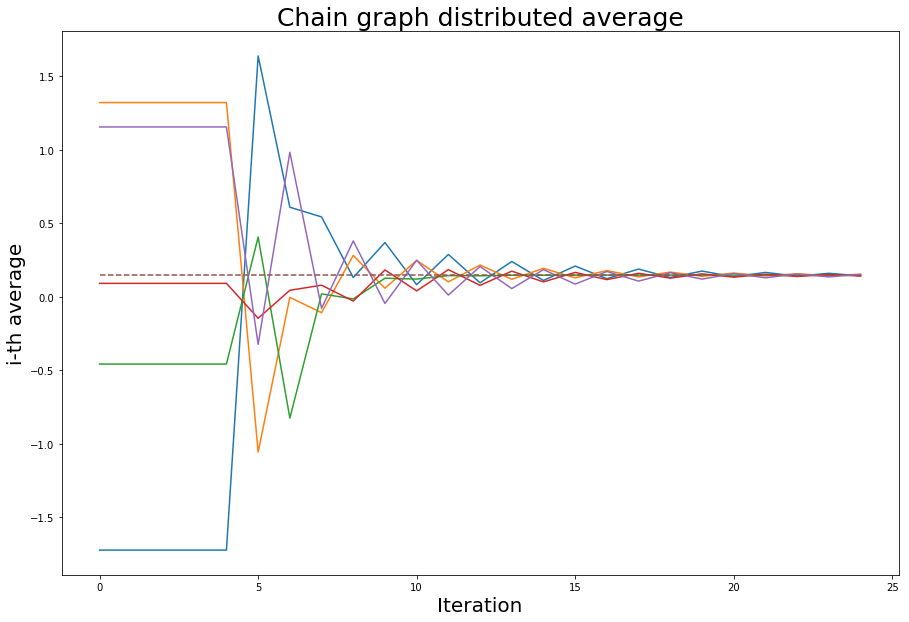

In [117]:
averages = np.asarray(X)
plt.figure(figsize=(15,10))
plt.xlabel('Iteration',size=20)
plt.ylabel('i-th average',size=20)
plt.title('Chain graph distributed average',size=25)
plt.plot(averages)
plt.plot(N_iter*[np.mean(t)],'--')